<h1>Regresion logistica</h1>
<h4>Heart Disease Cleveland UCI</h2>
<h3>Cristian Mateo Samboni Muñoz</h3><h3>Linda Katerin Rodriguez Moya</h3>    <h4>El proposito de este ejercicio es evaluar si el modelo de regresion lineal es optimo para detectar la presencia de enfermedad cardiaca</h2>
    <h4>Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad cardíaca</h4>

    

<h6>Empezamos importando las librerias y haciendo referencias a ellas por medio de variables</h6>

In [3]:
#importa librerias 
import pandas as pd # Maneja y analiza los datos
import numpy as np # Calcula y analiza los datos numericamente 
import seaborn as sns # Graficos estadisticos 
import matplotlib.pyplot as plt # Grafica en 2D

#hace referencias a las libreras al codigo 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay


<h6>Leemos los datos almacenados en el excel y los cargamos en el objeto Datos</h6>

In [5]:
Datos = pd.read_csv('D:/heart_cleveland_upload.csv')

<h6>leemos los datos para el analisis </h6>

In [9]:
Datos.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [11]:
# Descripcion de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<h3>Mostramos los datos atípicos</h3>

In [14]:
# Procesamos los datos, tratamos los datos faltantes y ajustándolos a la media de los datos 
print("Cantidad de registros con 0 años:", Datos['age'].isin([0]).sum())

# Muestra la cantidad de registros con edad mayor a 150 años
mayores_150 = (Datos['age'] > 150).sum()
print("Cantidad de registros con más de 150 años:", mayores_150)

# Muestra valores atípicos de la presión arterial en reposo (mmHg)
print("Cantidad de registros con la presión arterial en reposo igual a cero:", Datos['trestbps'].isin([0]).sum())

# Muestra la cantidad de registros con presión arterial mayor a 185
mayores_185 = (Datos['trestbps'] > 185).sum()
print("Cantidad de registros con la presión arterial mayor a 185:", mayores_185)

# Muestra valores atípicos del colesterol en la sangre 
print("Cantidad de registros con el colesterol igual a cero:", Datos['chol'].isin([0]).sum())

# Muestra valores atípicos de frecuencia cardíaca máxima alcanzada 
print("Cantidad de registros con la frecuencia cardíaca máxima igual a cero:", Datos['thalach'].isin([0]).sum())


Cantidad de registros con 0 años: 0
Cantidad de registros con más de 150 años: 0
Cantidad de registros con la presión arterial en reposo igual a cero: 0
Cantidad de registros con la presión arterial mayor a 185: 2
Cantidad de registros con el colesterol igual a cero: 0
Cantidad de registros con la frecuencia cardíaca máxima igual a cero: 0


<h5>Ahora limpiamos los datos atipicos el cual es la presion arterial (trestbps) pues una presion en reposo mayor a 180 es casi mortal, esta la reemplazamos por la media de presion arterial en reposo</h5>

In [80]:
# Reemplazamos los valores mayores a 185 (mas de 180 es igual a muerte instantanea) con la media de la columna 'trestbps'
Datos['trestbps'] = Datos['trestbps'].mask(Datos['trestbps'] > 185, Datos['trestbps'].mean())

# Corroboramos que los datos atipicos sean modificados
mayores_185 = (Datos['trestbps'] > 185).sum()
print("Cantidad de registros con la presión arterial mayor a 185:", mayores_185)

Cantidad de registros con la presión arterial mayor a 185: 0


<h4>Ahora revisamos graficamente si ahi mas datos atipicos en las demas variables</h4>

<h5>Esta accion la realizamos creando la clase grafica_atipicos pidiendo como datos las variable data (donde estan los datos), columna (variable que quiero seleccionar), ax (el lugar que ocupara en la grafica)</h5>

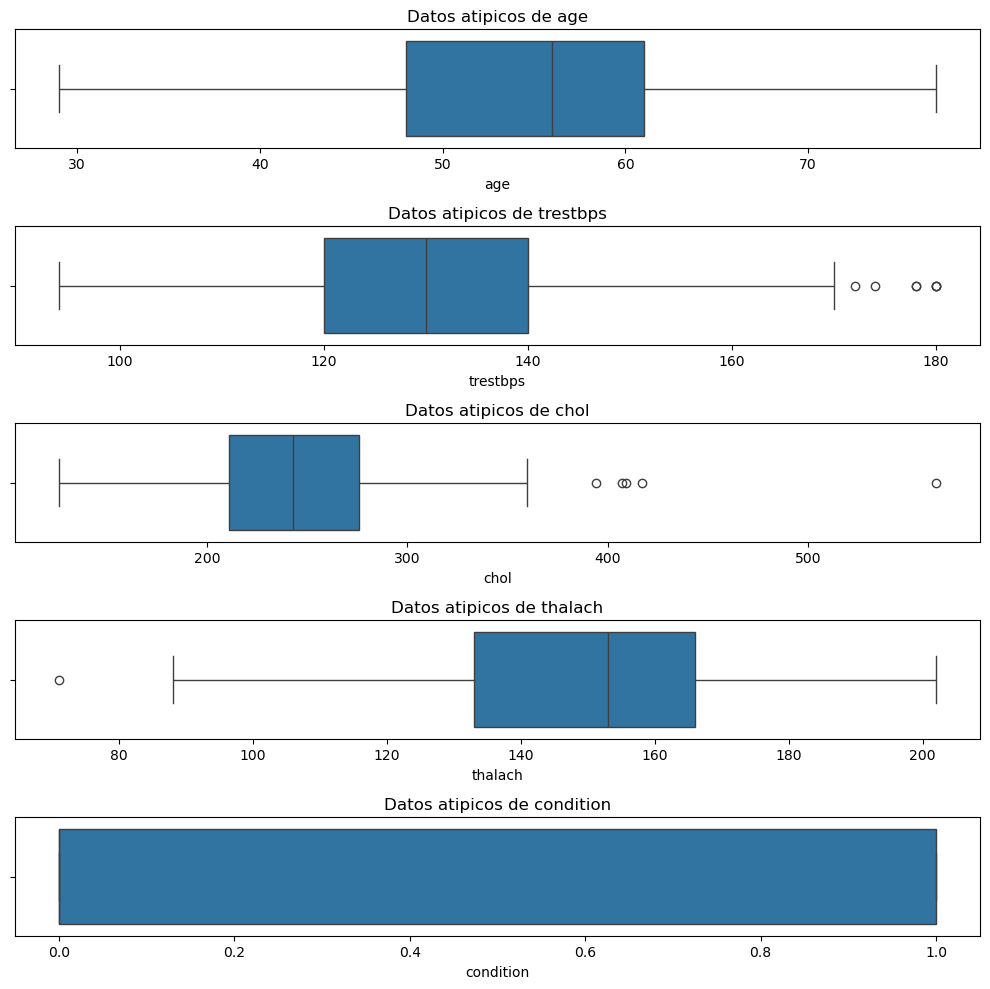

In [21]:
#
def grafica_atipicos(data, columna, ax):
    sns.boxplot(x = Datos[columna], ax = ax)
    ax.set_title("Datos atipicos de " + columna)
fig, axs = plt.subplots(5, 1, figsize = (10, 10))

grafica_atipicos(Datos, 'age', axs[0])
grafica_atipicos(Datos, 'trestbps', axs[1])
grafica_atipicos(Datos, 'chol', axs[2])
grafica_atipicos(Datos, 'thalach', axs[3])
grafica_atipicos(Datos, 'condition', axs[4])

plt.tight_layout()
plt.show()


<h5>Revisamos que no existan datos faltantes</h5>

In [24]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    float64
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.6 KB


<h3>Revisamos los datos despues de limpiarlos</h3>
<h6>Revisamos uno por uno para corroborar su limpieza</h6>

<h6>Datos sobre sexo</h6>

In [28]:
Datos['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

<h6>Datos sobre edad</h6>

In [31]:
Datos['age'].value_counts()

age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: count, dtype: int64

<h6>Datos sobre la presion arterial en reposo</h6>

In [34]:
Datos['trestbps'].value_counts()

trestbps
120.000000    37
130.000000    36
140.000000    32
110.000000    19
150.000000    17
160.000000    11
128.000000    10
138.000000    10
125.000000    10
112.000000     9
132.000000     7
118.000000     7
108.000000     6
124.000000     6
135.000000     6
152.000000     5
134.000000     5
145.000000     5
122.000000     4
100.000000     4
170.000000     4
115.000000     3
180.000000     3
136.000000     3
126.000000     3
105.000000     3
142.000000     3
131.693603     2
178.000000     2
144.000000     2
148.000000     2
146.000000     2
102.000000     2
94.000000      2
174.000000     1
123.000000     1
164.000000     1
114.000000     1
117.000000     1
165.000000     1
158.000000     1
101.000000     1
106.000000     1
129.000000     1
172.000000     1
155.000000     1
154.000000     1
156.000000     1
104.000000     1
Name: count, dtype: int64

<h6>Datos sobre el colesterol</h6>

In [37]:
Datos['chol'].value_counts()

chol
234    6
197    6
212    5
269    5
204    5
      ..
322    1
237    1
281    1
195    1
183    1
Name: count, Length: 152, dtype: int64

<h6>Datos sobre la maxima presion arterial</h6>

In [40]:
Datos['thalach'].value_counts()

thalach
162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: count, Length: 91, dtype: int64

<h2>Creación del modelo de regresion logistica</h2>

<h6>Dividimos el dataset en train(entrenar) y test(probar) para entrenar y evaluar el modelo 
    train = 75% - test = 25% <br>
    Se crean variables para almacenar los datos de entrenamiento <br>
    Se crea la variable entrenar la cual vamos a usar para entrenar pero sin la variable condition (esta nos dice si tiene problemas cardiacos o no)<br>
    Se crea la variable probar la cual vamos a usar para probar el modelo ya con la variable condition agregada</h6>

In [44]:
entrenar = Datos.drop('condition', axis = 1) # cargamos todos los datos y con axis=1 decimos que eliminamos la columna condition, si usamos axis = 0 eliminamos la fila 
probar = Datos['condition'] # cargamos todos los datos incluyendo condition 

# Ahora dividimos la cantidad de datos que usamos a entrenar el modelo y otra para probar el modelo
entrenar_train, entrenar_test, probar_train, probar_test = train_test_split(entrenar, probar, test_size = 0.25, stratify = probar, random_state = 0)

<h6>Imprimimos los datos que almacenamos en entrenar y que usamos para entrenar el modelo</h6>

In [47]:
print(entrenar_train)

     age  sex  cp    trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3  131.693603   288    1        2      133      1      4.0   
82    66    0   2  146.000000   278    0        2      152      0      0.0   
36    56    1   1  120.000000   240    0        0      169      0      0.0   
237   56    1   3  132.000000   184    0        2      105      1      2.1   
133   47    1   2  108.000000   243    0        0      152      0      0.0   
..   ...  ...  ..         ...   ...  ...      ...      ...    ...      ...   
291   40    1   3  110.000000   167    0        2      114      1      2.0   
195   61    0   3  130.000000   330    0        2      169      0      0.0   
170   65    0   3  150.000000   225    0        2      114      0      1.0   
135   46    0   2  142.000000   177    0        2      160      1      1.4   
293   39    1   3  118.000000   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1   

In [49]:
print(probar_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


<h2>Ahora entrenamos el modelo configurando los hiperparametros</h2>
<h6>Construimos el modelo de regresion lineal</h6>

In [52]:
modelo_regresion = LogisticRegression(solver = "liblinear") # Usamos la libreria sklearn.linear_model llamandola con la variable LogisticRegression y usamos la plabra clave solver para seleccionar el metodo que usara y liblinear es el metodo que usaremos
modelo_regresion.fit(entrenar_train, probar_train)

# Creamos el modelo de predicción
Modelo_Predictivo = modelo_regresion.predict(entrenar_test) #usamos la palabra clave predict para decirle al modelo que preiga los datos de acuerdo a lo que se almaceno en la variable entrenar 


In [54]:
print(probar_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [56]:
print (Modelo_Predictivo)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [58]:
# Evaluamos el modelo predictivo de regresion logistica segun las metricas de precision, recall, f1-score y support
print(classification_report(probar_test,Modelo_Predictivo))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



<h2>Evaluamos los resultados del modelo por medio de una matriz de confusion de manera grafica </h2>

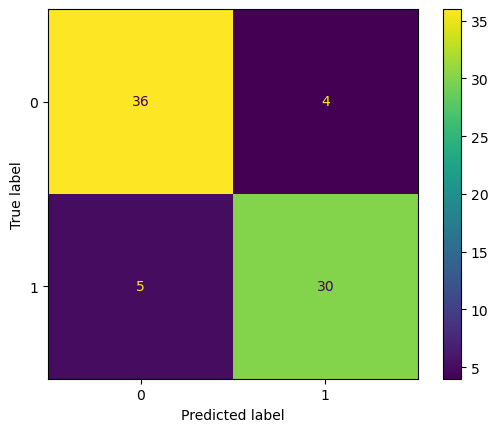

In [61]:
matriz = confusion_matrix(probar_test, Modelo_Predictivo)
grafica_matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz)
grafica_matriz.plot()

<h2>Procedemos revisar la capacidad del modelo para predecir si un paciente tiene problemas cardiacos, lo hacemos con una grafica lineal y hallamos el area bajo la curva</h2>

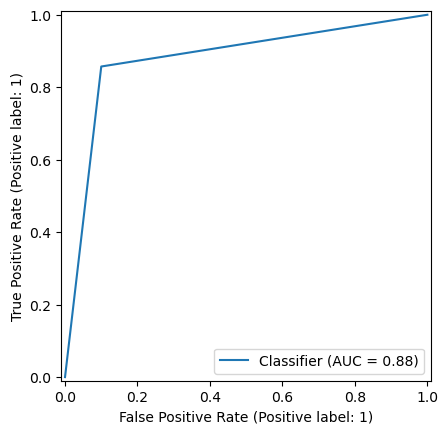

In [64]:
RocCurveDisplay.from_predictions(probar_test, Modelo_Predictivo)
plt.show()

<h2>Interpretación, analisis y documentación de los resultados del modelo de regresion logistica</h2>

<h3>Desempeño del modelo segun la tabla de los modelos de analisis de desempeño</h3>

<h6>- Precision: Este modelo muestra el porcentaje de verdaderos positivos sobre los positivos que muestran los datos. Muestra la calidad de las predicciones positivos. En este caso es del 0,88 tanto en 0 (no) y 1 (si) es del 0,88. Esto nos muestra que el modelo tiene buen rendimiento en este aspecto</h6>

<h6>- Recall: Mide la capacidad del modelo para identificar correctamente todos los casos positivos. En este caso para 0 (no) es del 0,90 y 1 (si) es del 0,86. Por tanto, el modelo que creamos tiene buen rendimiento en la identificación de casos positivos para problemas cardiacos. </h6> 

<h6>- F1-Score: Busca el equilibrio entre las metricas de precision y recall. En este caso para este modelo se ve un balance de 0,89 para 0 (no) y 0,87 para 1 (si).</h6>

<h6>- Support: uso de datos reales para la prueba del modelo para cada instancia. En este caso, para 0 (no) es de 40 y 1 (si) es de 35 datos usados</h6>


In [68]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit(entrenar_train, probar_train)
Modelo_Predictivo = modelo_regresion.predict(entrenar_test) 
print(classification_report(probar_test,Modelo_Predictivo))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



<h3>Capacidad del modelo de realizar una predicción</h3>

<h6>- Verdaderos negativos: el recuento es de 36, esto nos dice que de 36 datos en reales, el modelo predijo los 36 diciendo 0 (no) lo hizo de manera correcta de 40 resultados. </h6>
<h6>- Falsos negativos: el recuento es de 5, esto nos dice que el modelo se equivoco en decir que 0 (no) lo hizo de manera incorrecta 5 veces de 40 resultados.</h6>
<h6>- Verdaderos positivos: el recuento es de 30 datos diciendo que 1 (si), esto nos dice que de 35 datos diciendo que 1 (si), 30 fueron correctos.</h6> 
<h6>- Falsos positivos: el recuento es de 4 datos, esto nos dice que de 35 datos diciendo que 1 (si), 5 fueron errados.</h6> 

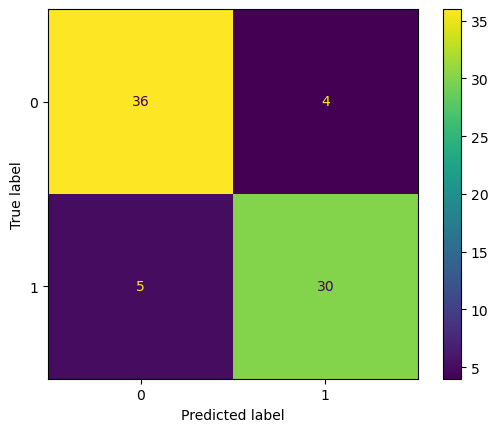

In [71]:
matriz = confusion_matrix(probar_test, Modelo_Predictivo)
grafica_matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz)
grafica_matriz.plot()

<h3>Corroboramos el porcentaje de efectividad del modelo</h3>
<h6>Como el area bajo la curva es de 0,88, podemos concluir que el modelo tiene muy buen rendimiento, del 88%</h6>

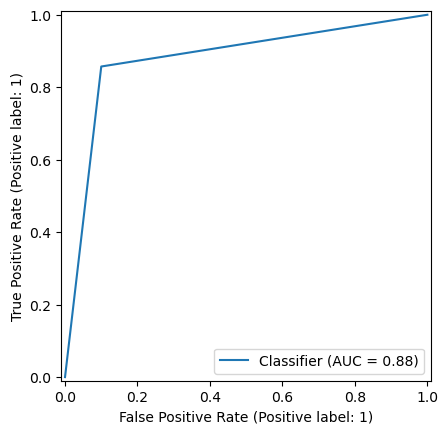

In [74]:
RocCurveDisplay.from_predictions(probar_test, Modelo_Predictivo)
plt.show()